In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [171]:
import matplotlib.pyplot as plt

import seaborn as sns

In [172]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are some rows with missing Total_bedrooms so we gonna just drop those rows

In [174]:
df.dropna(inplace = True)

In [175]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x = df.drop(['median_house_value'],axis = 1)

y = df['median_house_value']

In [178]:
x_train ,x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.3)

In [179]:
train_data = x_train.join(y_train)

In [180]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2925,-119.01,35.36,38.0,1838.0,388.0,1203.0,373.0,1.6797,INLAND,60700.0
17882,-122.01,37.40,24.0,1297.0,297.0,441.0,282.0,3.1439,<1H OCEAN,47500.0
4841,-118.29,34.03,38.0,1501.0,437.0,1777.0,441.0,2.0848,<1H OCEAN,135200.0
7060,-118.04,33.92,35.0,2469.0,522.0,2151.0,537.0,3.4219,<1H OCEAN,156200.0
16891,-122.37,37.59,52.0,2272.0,403.0,963.0,376.0,5.7245,NEAR OCEAN,500000.0
...,...,...,...,...,...,...,...,...,...,...
11141,-117.95,33.84,19.0,1749.0,406.0,969.0,391.0,3.7500,<1H OCEAN,173400.0
14711,-117.08,32.78,21.0,2919.0,496.0,984.0,443.0,4.6250,NEAR OCEAN,222800.0
16731,-120.49,35.35,17.0,3043.0,608.0,1457.0,545.0,3.1641,<1H OCEAN,158600.0
17439,-120.45,34.63,32.0,1840.0,309.0,828.0,333.0,4.5486,NEAR OCEAN,172400.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

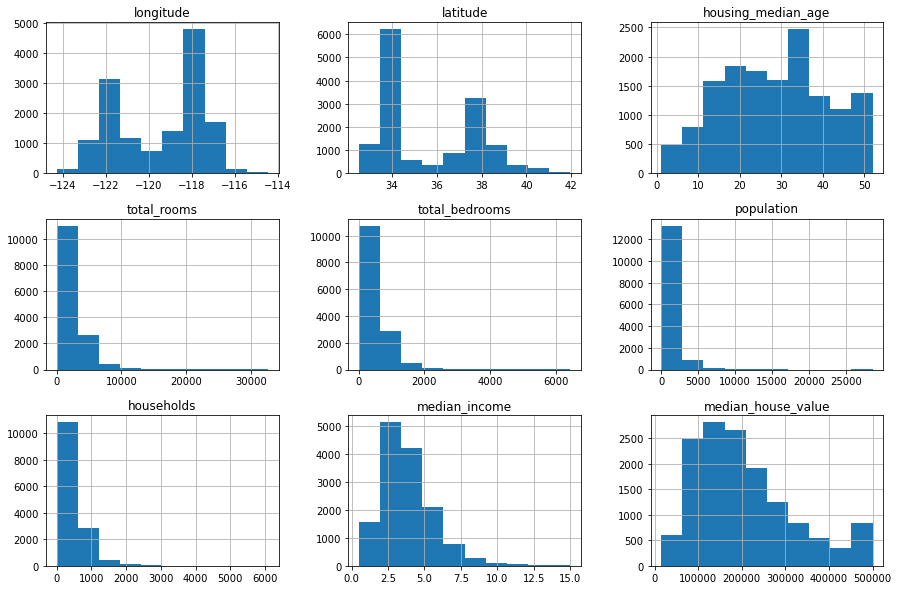

In [181]:
train_data.hist(figsize = (15,10))

<AxesSubplot:>

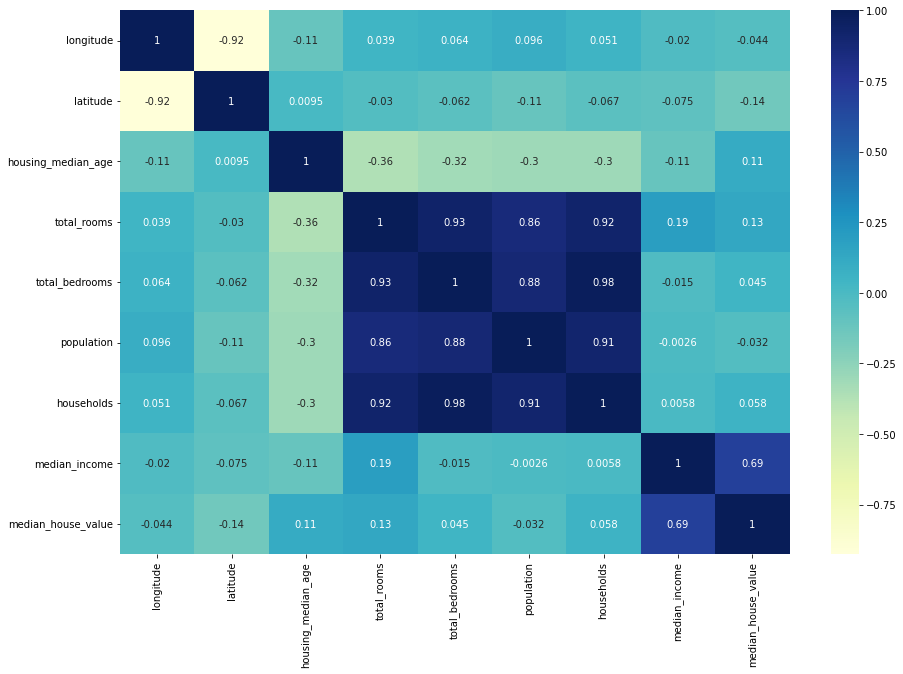

In [182]:
plt.figure(figsize = (15,10))

sns.heatmap(train_data.corr() , annot = True ,cmap = 'YlGnBu')

In [183]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)

train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)

train_data['population'] = np.log(train_data['population'] +1)

train_data['households'] = np.log(train_data['households'] +1)




array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

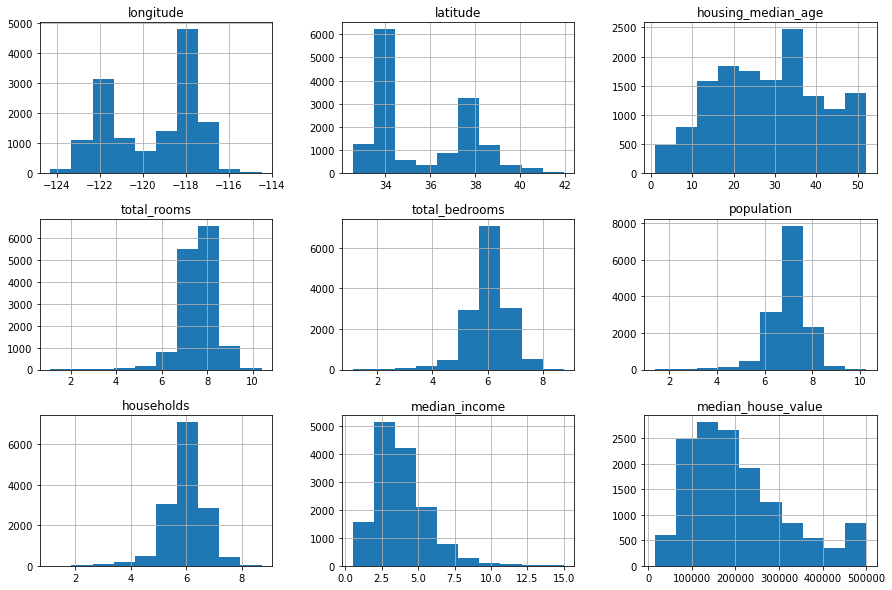

In [184]:
train_data.hist(figsize = (15,10))

In [185]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     6330
INLAND        4545
NEAR OCEAN    1857
NEAR BAY      1568
ISLAND           3
Name: ocean_proximity, dtype: int64

In [186]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)

In [187]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2925,-119.01,35.36,38.0,7.516977,5.963579,7.093405,5.924256,1.6797,60700.0,0,1,0,0,0
17882,-122.01,37.40,24.0,7.168580,5.697093,6.091310,5.645447,3.1439,47500.0,1,0,0,0,0
4841,-118.29,34.03,38.0,7.314553,6.082219,7.483244,6.091310,2.0848,135200.0,1,0,0,0,0
7060,-118.04,33.92,35.0,7.811973,6.259581,7.674153,6.287859,3.4219,156200.0,1,0,0,0,0
16891,-122.37,37.59,52.0,7.728856,6.001415,6.871091,5.932245,5.7245,500000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,-117.95,33.84,19.0,7.467371,6.008813,6.877296,5.971262,3.7500,173400.0,1,0,0,0,0
14711,-117.08,32.78,21.0,7.979339,6.208590,6.892642,6.095825,4.6250,222800.0,0,0,0,0,1
16731,-120.49,35.35,17.0,8.020928,6.411818,7.284821,6.302619,3.1641,158600.0,1,0,0,0,0
17439,-120.45,34.63,32.0,7.518064,5.736572,6.720220,5.811141,4.5486,172400.0,0,0,0,0,1


<AxesSubplot:>

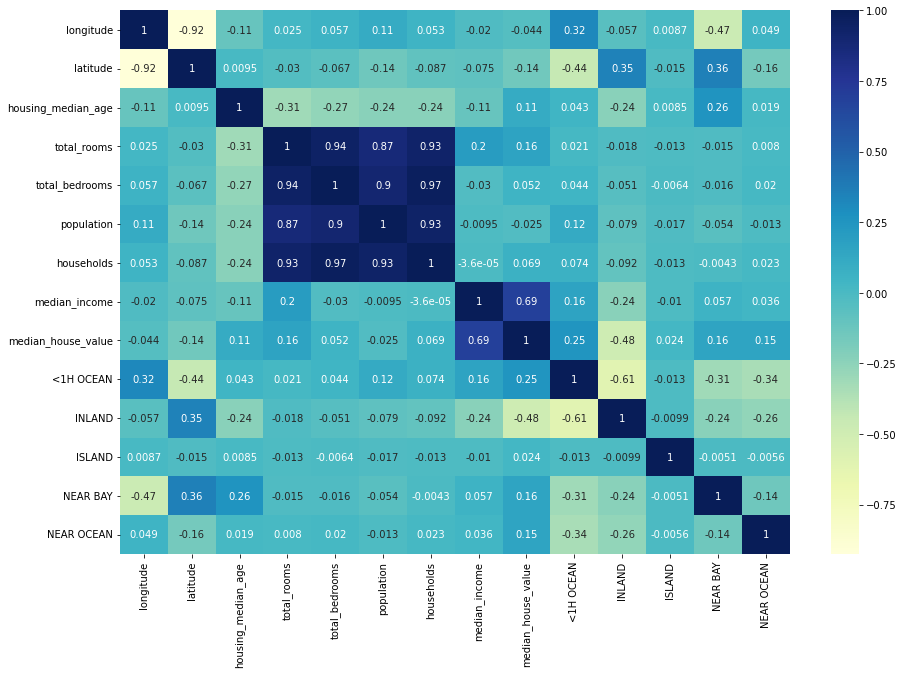

In [188]:
plt.figure(figsize = (15,10))

sns.heatmap(train_data.corr() , annot = True ,cmap = 'YlGnBu')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

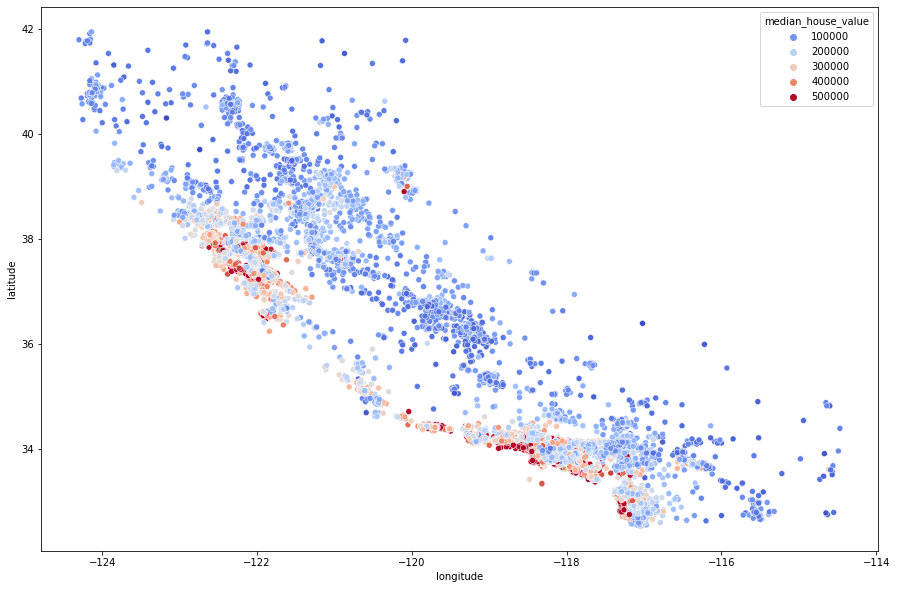

In [189]:
plt.figure(figsize = (15,10))

sns.scatterplot(x='longitude',y='latitude' ,data = train_data , hue = 'median_house_value' , palette= 'coolwarm')

In [190]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

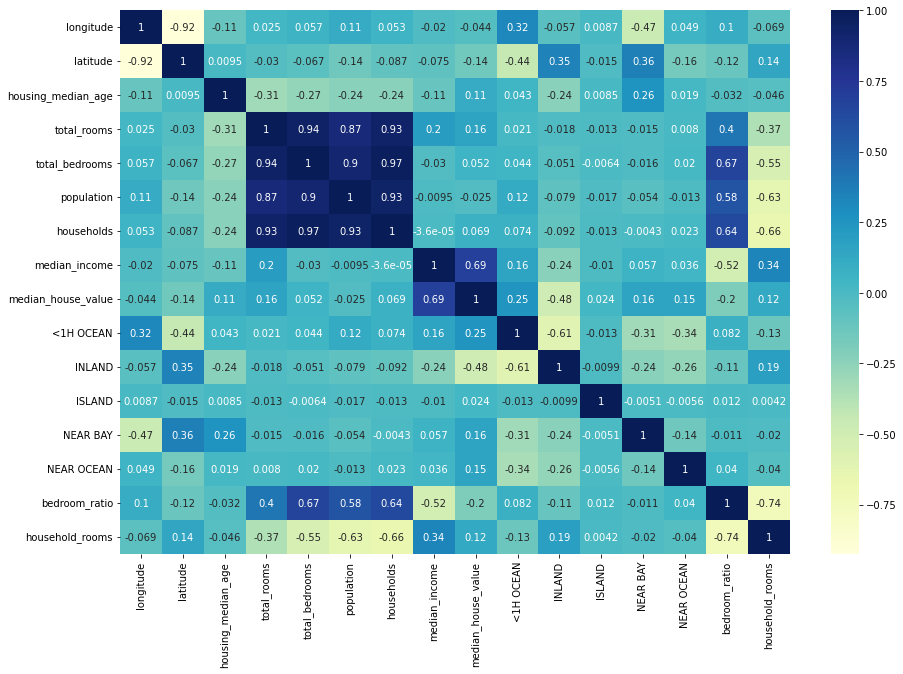

In [191]:
plt.figure(figsize = (15,10))

sns.heatmap(train_data.corr() , annot = True ,cmap = 'YlGnBu')

In [192]:
from sklearn.linear_model import LinearRegression

x_train , y_train = train_data.drop(['median_house_value'],axis =1) , train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train , y_train)

LinearRegression()

In [193]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)

test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)

test_data['population'] = np.log(test_data['population'] +1)

test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)


test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']

test_data['household_rooms'] = test_data['total_rooms']/test_data['households']



In [196]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [194]:
x_test , y_test = test_data.drop(['median_house_value'],axis =1) , test_data['median_house_value']

0.6666864130676619

In [197]:
x_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_rooms'],
      dtype='object')

The testing data has no island column so we'll add a new island column with all values "0"s because regression  model needs 15 features or we can simply drop the rows where island = 1 

In [198]:
x_test['ISLAND'] = 0

In [200]:
reg.score(x_test,y_test)

0.6667283620967164

In [203]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [204]:
forest.score(x_test,y_test)

0.8150482521389409